In [1]:
from IPython.display import HTML, Image
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click to toggle on/off the raw code">
</form>''')

In [2]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [7]:
# Importing Libraries
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"

import pandas as pd
import numpy as np
import tensorflow as tf
import datetime
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, Bidirectional
from keras.models import Sequential

![](https://imgur.com/71Sl5gC.jpg)

## <font color='#A37C2D'>I. Highlights<font color='#A37C2D'>

1. The uptick in `oil price` Google searches and actual oil prices began with the outbreak of the Russia-Ukraine conflict.
2. Google Trends, which represents consumer interest, successfully augmented and enhanced the forecast, as compared to GDELT Tone, which represents businesses as the top news media's readership.
3. In forecasting volatile time series data, assigning an appropriate lookback window and corresponding prediction horizon is crucial.
4. The ability of bidirectional RNN models to capture some dependencies from both forward and reverse time order processing (past and future states) generated high forecast performance.

## <font color='#A37C2D'>II. Introduction <font color='#A37C2D'>

<center>
       <font size="2.5"><b>Figure 1.Oil Price Increases Made International and Local Headlines</b></font>
</center>

<img src=https://imgur.com/duBoL51.jpg width="450">


### Oil Price Shocks
The world was shocked when Russia invaded Ukraine in the last week of February this year, causing oil prices to skyrocket. This upsurge was attributed to supply disruptions rather than rising demand for oil, which typically fuels the spikes.[[1]](https://www.reuters.com/business/energy/oil-prices-climb-market-weighs-release-reserves-vs-russia-disruption-2022-03-01/) As the geopolitical tensions between Russia and Ukraine escalate, so do oil price records.

The top energy experts predicted that oil prices would continue to rise, reaching 140 dollars per barrel,[[2]](https://fortune.com/2022/02/24/ukraine-crisis-oil-gas-price-outlook/) but the trends appeared too volatile to forecast. As illustrated in Figure 2, the price of oil fluctuates.[[3]](https://oilprice.com/oil-price-charts/) The three primary and dominant benchmarks of oil prices are West Texas Intermediate (WTI), Brent Crude, and Dubai, which represent different regions where oil was extracted and mostly marketed:[[4]](https://www.investopedia.com/articles/investing/102314/understanding-benchmark-oils-brent-blend-wti-and-dubai.asp)
- WTI: USA
- Brent Crude: North Sea; two-thirds of the world 
- Dubai: Asia

<center>
       <font size="2.5"><b>Figure 2. Oil Prices in the Past Month (Feb - Mar 2022)</b></font>
</center>

<img src=https://imgur.com/Hl2cP2J.jpg width="300">


### Impact on the Global Economy
Oil is one of the world's most valuable commodities, as it is used in everything from personal to household items to transportation and energy. As oil contributes to global GDP, the increases in its price are linked to higher inflation and slower economic growth.[[5]](https://www.weforum.org/agenda/2022/02/why-oil-prices-matter-to-global-economy-expert-explains/) The political climate is also seen to magnify the impact of rising oil prices on the world economy,  with fears that demand destruction and economic recession may result.[[6]](https://www.cnbc.com/2022/03/03/economic-destruction-may-lie-ahead-as-oil-prices-surge-analyst.html)


### Impact on Philippine Consumption
The Philippine economy has yet to fully recover from the impacts of the coronavirus pandemic, and the recent oil price surge is expected to delay the country's recovery even more.[[7]](https://www.rappler.com/business/rising-oil-prices-could-hurt-economic-recovery-philippines/) As a non-oil producing country, the Philippines imports roughly 250 thousands of barrels per day, with 80% coming from the Middle East and the rest from Russia.[[8]](https://www.doe.gov.ph/downstream-oil/later-oil-supply-demand?page=1&withshield=1#main-content)

The domino effect of the sharp increase in the prices of oil products has reached Filipino consumers. Oil-dependent products and services have already gone up in price, adding to the consumer's burden of high inflation and peso depreciation.[[9]](https://ph.news.yahoo.com/oil-price-hike-is-just-the-beginning-the-domino-effects-of-russia-ukraine-conflict-philippines-031930149.html) With their purchasing power dwindling, Filipinos are doing everything they can to limit their oil consumption, which has an impact on their everyday activities and quality of life.


### Sana Oil
The oil price situation is felt by the team, and it is in our interest to better understand the  various indicators that influence oil prices. Leveraging deep learning techniques, this project aims to create an oil price forecasting model capable of capturing the volatile nature of oil price time-series data, which has been exacerbated by the instability caused by the Russia-Ukraine conflict.

The insights obtained from this project may assist economic policymakers in addressing the current oil price crisis, as well as consumers in planning around and maximizing the forecasted direction of oil prices.

## <font color='#A37C2D'>III. Dataset <font color='#A37C2D'>

This study utilized a total of five data sets for this project, taken from various sources. The period covered for this dataset was from July 2014 to February 2022. The different datasets used are detailed in the next subsections.

### Oil Price Index
The study aims to predict the crude oil price of Dubai. This country was chosen as a proxy for the Philippines due to the fact that our local crude oil prices are dictated by those of Dubai. The dataset used for forecasting the Dubai Crude Oil Index was downloaded from https://oilprice.com/.

### Commodity Indices
One macroeconomic variable used to forecast the Dubai Crude Oil Index was commodity indices, which measure the change in price of a collection of commodities. This data was sourced from https://stooq.com/, which contained the Commodity Research Bureau Index (CRB).

### US Currency Index
Another macroeconomic variable used was exchange rate, specifically, the US currency. The data was sourced from the Federal Reserve Economic Data (FRED) at https://fred.stlouisfed.org/.

### 4. GDELT
Our forecast was also augmented by using media and sentiment indicators coming from the Global Database of Events, Language and Tone (GDELT). The GDELT 2.0 Mentions Table was used, which tracks the trajectory and network structure of a story and records it every 15 minutes. The GDELT data was extracted using [Google BigQuery](https://www.gdeltproject.org/data.html#googlebigquery).

### 5. Google Trends
Another media indicator used was data from Google Trends. This was scraped from [trends.google.com](https://trends.google.com/trends/) using Google Trends API.  The dataset contained the daily trends of Google searches for keywords related to `oil price` from 01 January 2014 to 13 March 2022 (the latest data available on the platform). 

## <font color='#A37C2D'>IV. Methodology <font color='#A37C2D'>

<img src=https://imgur.com/6wrnboy.jpg>

*Figure 3* shows the main processes and tasks involved in this project. Other specific tasks are listed below. 


### 1. Data Consolidation
Given that we collected data on the Crude Oil Price Index, the US Dollar Currency Index, the Global Commodity Index, Google Trends data and GDELT data, we combined these different data sources into a single Pandas DataFrame with common date indexes. By combining datasets, the data coverage was from 28 July 2014 to 28 February 2022.

### 2. Train-Validation-Test Splitting
As with modeling time-series data, careful segmentation of how the data will be classified into train-validation-test should be considered since historical information affects future data, and not the other way around. As such, the data was segmented into training, validation, and test dataset as follows:

**Train Dataset**: July 2014 to July 2021
**Validation Dataset**: August 2021 to December 2021
**Test Dataset**: January 2022 to February 2022

### 3. Model Creation
We used several architectures to forecast oil prices as follows:

1. Naïve (3-day and 365-days)
2. Autoregressive Integrated Moving Average (ARIMA) model
3. Neural Networks
4. Vanila RNN
5. Bidirectional LSTM
6. Bidirectional GRU

The **Naïve model** simply used the recent data, whether based on a short time-horizon look-back, and used that as forecast for future dates. This model was reasonable and lacks the need for complex algorithms. This model is also referred to as the persistence method in temperature and weather forecasting.

The **Traditional Time-Series forecasting** involved looking at the values of the immediately preceding values of the data to predict the future. Instead of directly copying a previous value as the future forecast, a weighted average of the previous values can be obtained instead. This is the Autoregressive (AR) component of the ARIMA model. The Moving Average (MA) component is using the past forecast errors instead as the predictor of future values, while the Integrated (I) component of the ARIMA model pertains to how many times the original data was differenced to achieve non-seasonality.

The **base RNN model** was also used as a reference point. This was executed using Keras' `SimpleRNN`. This methodology uses the Deep Learning architecture where neurons of the model receives inputs, produces an output and sending that output back to itself.

The **Bidirectional model** is an enhanced RNN model that utilizes 2 RNNs: one that moves forward and another one that moves in reverse. For the Long Short-Term Memory (LSTM) variant, each layer of the decoder and encoder uses an LSTM cell which benefits from the enhancement that enables it to get information from long periods back and avoiding the vanishing gradient problem by using elements in the architecture called forget gate and input gate. The Gated Recurrent Unit (GRU) variant is also similar to the LSTM model but simplified in such a way that the gates in LSTM are combined into a single reset gate.

### 4. Model Evaluation
The performance of each model was evaluated by comparing the forecasted values to the actual values for that period using the **Average Mean Absolute Error (MAE)** . Each model was validated and tested on both the validation and test datasets.

## <font color='#A37C2D'>V. Exploratory Data Analysis<font color='#A37C2D'>

### 1. Macroeconomic Indicators

In [8]:
df_crude = pd.read_csv('Dubai Crude Oil.csv')
df_crude['Date'] = pd.to_datetime(df_crude['Date'], dayfirst=True)
df_crude = df_crude[df_crude['Date'] >= datetime(2016, 1, 1)]
df_crude = df_crude.sort_values(by='Date').reset_index().drop('index', axis=1)
df_crude = df_crude[['Date', 'Price']].set_index('Date')

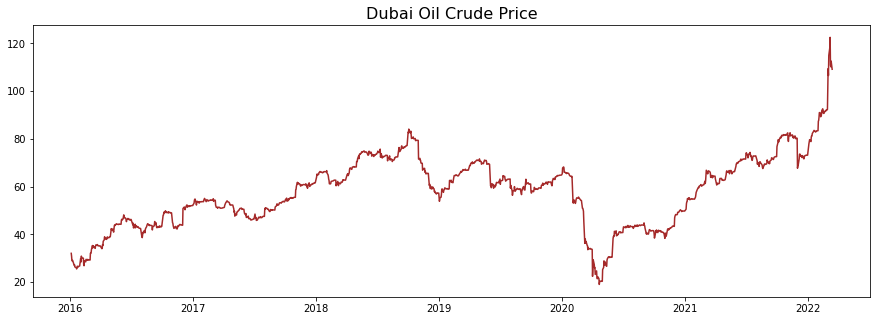

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(df_crude.index, df_crude['Price'], color='brown')
plt.title('Dubai Oil Crude Price', fontsize=16)
plt.show()

In [253]:
df_commodity = pd.read_csv('Global Commodity Index.csv')
df_commodity['Date'] = pd.to_datetime(df_commodity['Date'], dayfirst=True)
df_commodity = df_commodity[df_commodity['Date'] >= datetime(2016, 1, 1)]
df_commodity = df_commodity.drop(['Open', 'High', 'Low'], axis=1)
df_commodity = df_commodity.rename(columns={'Close': 'CRB Commodity Index'})

# df_commodity_res = df_commodity.set_index('Date').resample('W-FRI')['CRB Commodity Index'].mean().round(2)
# df_commodity_res
df_commodity = df_commodity.set_index('Date')

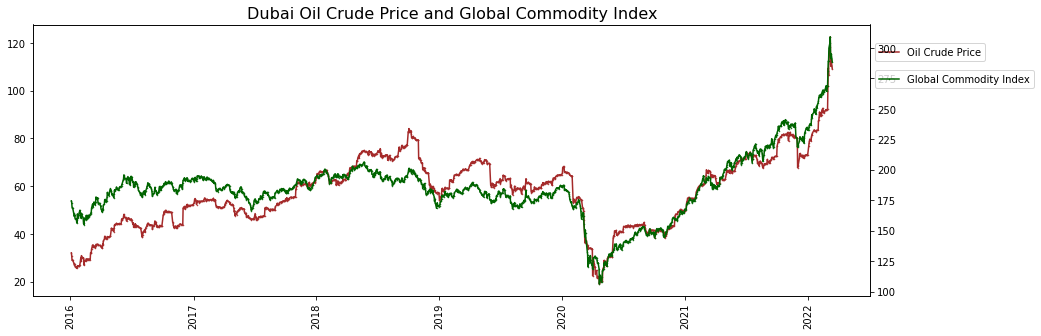

In [307]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.tick_params(axis='x', labelrotation=90)
ax.plot(df_crude.index, df_crude['Price'],
        color='brown', marker='.', 
        markersize=1, label='Oil Crude Price')
ax.legend(bbox_to_anchor=(1, 0.95))
ax = ax.twinx()
ax.plot(df_commodity.index, df_commodity['CRB Commodity Index'],
        color='darkgreen', marker='.', 
        markersize=1, label='Global Commodity Index')
ax.set_title('Dubai Oil Crude Price and Global Commodity Index', fontsize=16)
ax.legend(bbox_to_anchor=(1, 0.85))
plt.show()

We can observe from the plot above that the an increase in the price of global commodities used in energy production tends to increase oil prices as well.

In [254]:
df_dollar = pd.read_csv('US Dollar Currency Index.csv')
df_dollar = df_dollar.dropna()
df_dollar['Date'] = pd.to_datetime(df_dollar['Date'], dayfirst=True)
df_dollar = df_dollar[df_dollar['Date'] >= datetime(2016, 1, 1)]
df_dollar = df_dollar[['Date', 'Close']]
df_dollar = df_dollar.rename(columns={'Close': 'US Dollar Index'})
df_dollar = df_dollar.set_index('Date')

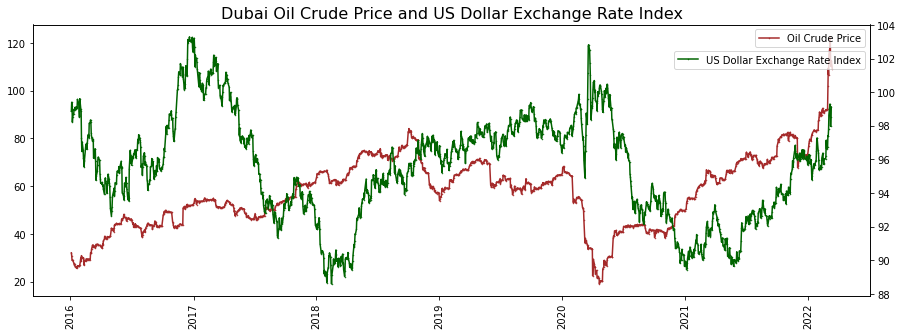

In [313]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.tick_params(axis='x', labelrotation=90)
ax.plot(df_crude.index, df_crude['Price'],
        color='brown', marker='.', 
        markersize=1, label='Oil Crude Price')
ax.legend(loc=5, bbox_to_anchor=(1, 0.95))
ax = ax.twinx()
ax.plot(df_dollar.index, df_dollar['US Dollar Index'],
        color='darkgreen', marker='.', 
        markersize=1, label='US Dollar Exchange Rate Index')
ax.set_title('Dubai Oil Crude Price and US Dollar Exchange Rate Index',
             fontsize=16)
ax.legend(loc=5, bbox_to_anchor=(1, 0.87))
plt.show()

However, the increases in the US exchange rate index -- which indicates a strengthening of the dollar relative to all other currencies in the world -- would lead to drops in the oil prices. This is shown in the plot above.

In [255]:
df = pd.concat([df_crude, df_commodity, df_dollar], axis=1)
df_inter = df.interpolate(method='linear')
#df_inter['day_lag'] = df_inter['Price'].shift(periods=1)
df_inter = df_inter.dropna()

In [10]:
gtrends_df = pd.read_csv('gtrends_averaged_intent.csv')[['Date', 'oil prices (averaged)']]
gtrends_df['Date'] = pd.to_datetime(gtrends_df['Date'])
gtrends_df = gtrends_df.set_index('Date')
gtrends_df.iloc[-1, 0] = (gtrends_df.iloc[-3, 0] + gtrends_df.iloc[-2, 0]) / 2
gtrends_df = gtrends_df.rename(columns={'oil prices (averaged)': 'google_searches'})

In [11]:
gdelt_df = (pd.read_csv('gdelt_avg_tone_oil_price-s.csv')[['DT', 'AVG_TONE', 'COUNT_EVENT']])
gdelt_df = gdelt_df.rename(columns={'DT': 'Date', 'AVG_TONE': 'global_news_sentiment',
                                    'COUNT_EVENT': 'news_count'})
gdelt_df['Date'] = pd.to_datetime(gdelt_df['Date'])
gdelt_df = gdelt_df.set_index('Date')

In [3]:
df_new = pd.merge(df, gdelt_df, left_index=True, right_index=True, how='left')
df_new = pd.merge(df_new, gtrends_df, left_index=True, right_index=True, how='left')
df_new = df_new.drop(['global_news_sentiment', 'news_count'], axis=1)
df_new.iloc[-1, 2] = 99
df_inter_new = df_new.interpolate(method='linear')

### 2. Google Trends

With nearly four billion users worldwide and one billion active monthly users, Google is consistently the most visited website.[[10]](https://www.statista.com/topics/1001/google/#dossierKeyfigures) It has been a "trusted" source of information for general news, reflecting consumer interest in various products, brands, and topics, among others. Consequently, when the oil price surge started, people all over the world began searching for information about it on Google. Table 1 displays the most frequently searched keywords related to oil prices.

<br>
<center>
       <font size="2.5"><b>Table 1. Google Trends: Most Searched Oil Price-Related Keywords and Corresponding Search Volume (01 January to 17 March, 2022)</b></font>
</center>

|  | Keyword | Average Search Volume (Worldwide) |
|:---|:--- |:---:|
| 1 | oil and war | 200 |
| 2 | oil price | 850,800 |
| 3 | oil prices | 941,300 | 
| 4 | price of oil | 740,100 |
| 5 | oil prices today | 130,700 |
| 6 | oil prices news | 52,600 |
| 7 | crude oil price today | 72,600 | 
| 8 | crude oil price | 394,500 | 
| 9 | crude oil prices | 425,500 |
| 10 | gas price | 180,100 |
| 11 | gas prices | 385,900 |

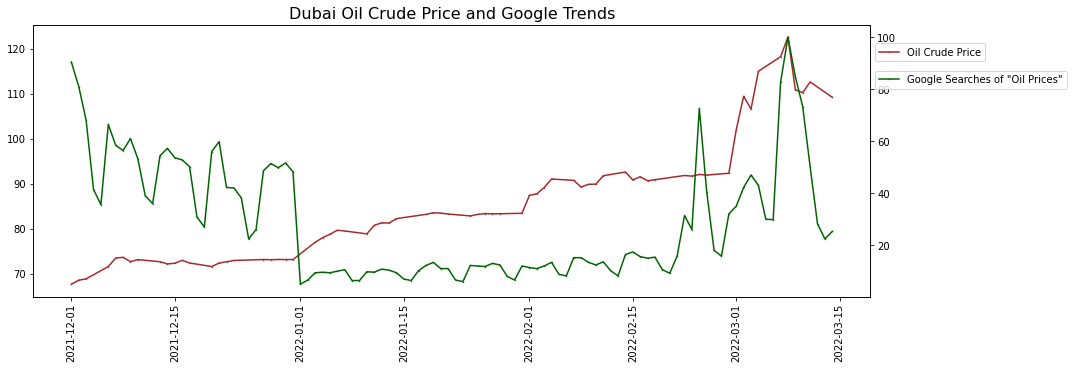

In [344]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.tick_params(axis='x', labelrotation=90)
ax.plot(df_crude.index[-71:], df_crude['Price']['2021-12-01':],
        color='brown', marker='.', 
        markersize=1, label='Oil Crude Price')
ax.legend(bbox_to_anchor=(1, 0.95))
ax = ax.twinx()
ax.plot(gtrends_df.index[-104:], gtrends_df['google_searches']['2021-12-01':],
        color='darkgreen', marker='.', 
        markersize=1, label='Google Searches of "Oil Prices"')
ax.set_title('Dubai Oil Crude Price and Google Trends', fontsize=16)
ax.legend(bbox_to_anchor=(1, 0.85))
plt.show()

The plot above shows that Google searches of `oil price` related keywords tend to be associated with the stability in the movement of the oil price index.

### 3. GDELT Tone

The [GDELT Project](https://www.gdeltproject.org/) claims to be the largest, most comprehensive, and highest resolution open database of human society ever created. It monitors the world's broadcast, print, and online news media. The tone is a sentiment score calculated by GDELT using machine learning to analyze the content of news articles. Negative scores typically reflect a more negative sentiment extracted from the article. The data used in analysis ranges from 01 January 2014 to 16 March 2022, with observed missing data for certain dates. 

<br>
<center>
       <font size="2.5"><b>Table 2. GDELT: Top News Sources for Oil Price-Related Articles and Corresponding Tones (01 January to 17 March, 2022)</b></font>
</center>

|  | News Source | Article Count (Unique) | Average Tone |
|:---|:---|:---|:---:|
| 1 | msn.com | <center>70 </center> | -3.11|
| 2 | menafn.com | <center>45 </center> | -2.38 |
| 3 | oilprice.com | <center>30 </center> | -2.31 |
| 4 | business-standard.com | <center>20 </center> | -0.55|
| 5 | iheart.com | <center>19</center> | -2.44 |
| 6 | indiatimes.com | <center>16 </center> | -2.34 |
| 7 | bnnbloomberg.ca | <center>16</center> | -3.8 |
| 8 | businesstoday.in | <center>14</center> | -3.22 |
| 9 | businessinsider.com| <center>13</center> | -3.7 |
| 10 | thestar.com.my | <center>12</center> | -3.29 |

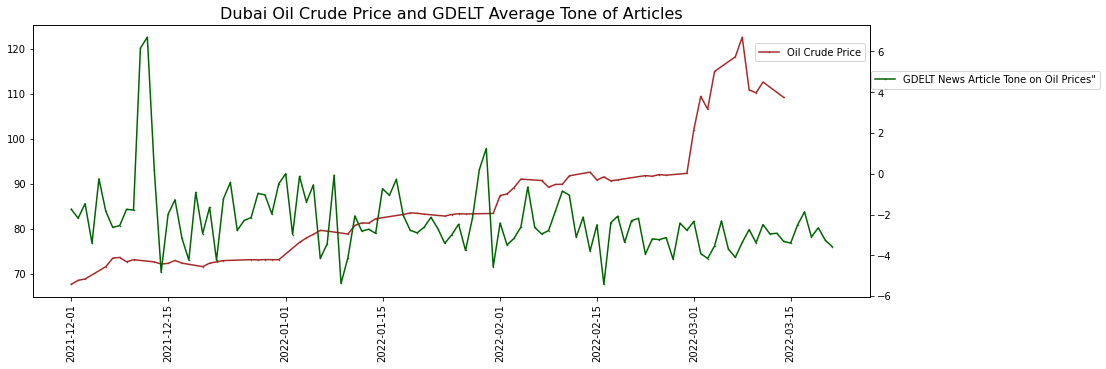

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.tick_params(axis='x', labelrotation=90)
ax.plot(df_crude.index[-71:], df_crude['Price']['2021-12-01':],
        color='brown', marker='.', 
        markersize=1, label='Oil Crude Price')
ax.legend(bbox_to_anchor=(1, 0.95))
ax = ax.twinx()
ax.plot(gdelt_df.index[-111:], gdelt_df['global_news_sentiment']['2021-12-01':],
        color='darkgreen', marker='.', 
        markersize=1, label='GDELT News Article Tone on Oil Prices"')
ax.set_title('Dubai Oil Crude Price and GDELT Average Tone of Articles', fontsize=16)
ax.legend(bbox_to_anchor=(1.28, 0.85))
plt.show()

The plot above demonstrates that the tone of the different news articles in GDELT tends to just randomly fluctuate regardless of the Dubai Oil price.

## <font color='#A37C2D'>VI. Results & Discussion<font color='#A37C2D'>

In [15]:
ts_train_new = df_inter_new.loc[train_idx_new].to_numpy()
ts_val_new = df_inter_new.loc[val_idx_new].to_numpy()
ts_test_new = df_inter_new.loc[test_idx_new].to_numpy()

# scale 
scaler = StandardScaler()
ts_train_new = scaler.fit_transform(ts_train_new)
ts_val_new = scaler.transform(ts_val_new)
ts_test_new = scaler.transform(ts_test_new)

In [32]:
# split into input and outputs
train_X_new, train_y_new = ts_train_new[:, 1:], ts_train_new[:, 0]
val_X_new, val_y_new = ts_val_new[:, 1:], ts_val_new[:, 0]
test_X_new, test_y_new = ts_test_new[:, 1:], ts_test_new[:, 0]

# reshape input to be 3D [samples, timesteps, features]
train_X_new = train_X_new.reshape((train_X_new.shape[0], 1, train_X_new.shape[1]))
val_X_new = val_X_new.reshape((val_X_new.shape[0], 1, val_X_new.shape[1]))
test_X_new = test_X_new.reshape((test_X_new.shape[0], 1, test_X_new.shape[1]))
print(train_X_new.shape, train_y_new.shape, val_X_new.shape, val_y_new.shape, test_X_new.shape, 
      test_y_new.shape) 

## 1. Baseline Models

### 1.A. Naive Forecast

In [159]:
ts = df_crude.copy()

# NEW
df_inter = df_crude.copy()

# Train-Val-Test
train_idx = df_inter.loc[:'2021-07-31'].index
val_idx = df_inter.loc['2021-08-01':'2021-12-31'].index
test_idx = df_inter.loc['2022-01-01':'2022-03-14'].index

print(f'Train size: {len(train_idx)}')
print(f'  Val size: {len(val_idx)}')
print(f' Test size: {len(test_idx)}')

Train size: 1402
  Val size: 107
 Test size: 49


In [160]:
def multiple_n_step(ts, shift_n=1):
    col_name = ts.columns[0]
    # forecast shift_n days in of the validation or test period
    df_f_naive_mos = pd.DataFrame()
    df_f_naive_mos = ts[shift_n:].copy()
    df_f_naive_mos.rename(columns={col_name:'Actual'}, inplace=True)
    ts_f = ts.copy()
    start_time = min(df_f_naive_mos.index)
    to_forecast = len(ts_f[start_time:])
    y_hat = ts_f[-to_forecast-shift_n:-shift_n].to_numpy()
    df_f_naive_mos['Predicted'] = y_hat
    return df_f_naive_mos

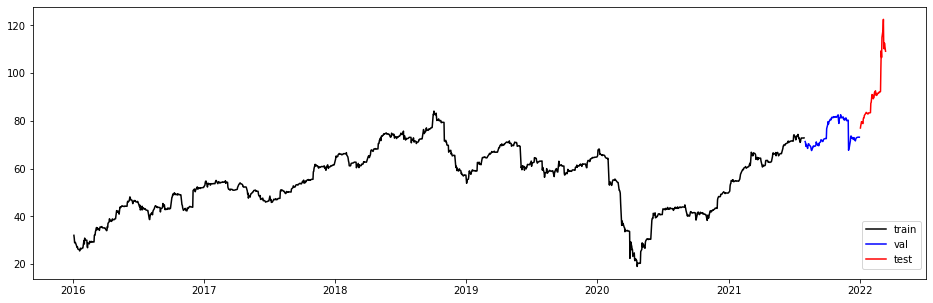

In [170]:
ts_train = ts.loc[train_idx]
ts_val = ts.loc[val_idx]
ts_test = ts.loc[test_idx]

fig, ax = plt.subplots(figsize=(16,5))
ts = df_crude.copy()
ax.plot(list(ts_train.index), ts_train['Price'], c='black', label='train')
ax.plot(ts_val.index, ts_val['Price'], c='blue', label='val')
ax.plot(ts_test.index, ts_test['Price'], c='red', label='test')
fig.legend(bbox_to_anchor=(0.9, 0.3))
fig.show()

Validation Naive MAE: 1.73
1.7322549019607838


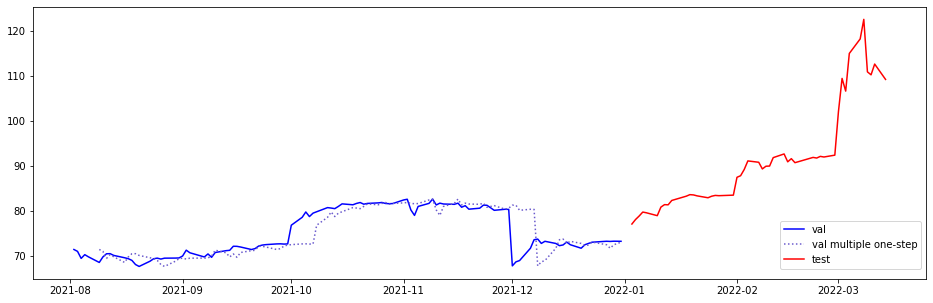

In [175]:
ts_val_mos = multiple_n_step(ts_val, shift_n=5)

fig, ax = plt.subplots(figsize=(16,5))
# ax.plot(ts_train.index, ts_train, c='black', label='train')
ax.plot(ts_val.index, ts_val['Price'], c='blue', label='val')
ax.plot(ts_val_mos.index, ts_val_mos['Predicted'], c='slateblue',
        label='val multiple one-step', linestyle='dotted')
ax.plot(ts_test.index, ts_test['Price'], c='red', label='test')
fig.legend(bbox_to_anchor=(0.9, 0.3))
fig.show()

print('Validation Naive MAE: {:.2f}'.format(mae(ts_val_mos)))
print(mean_absolute_error(ts_val_mos['Actual'],  ts_val_mos['Predicted']))

Test Naive MAE: 4.52
4.522954545454547


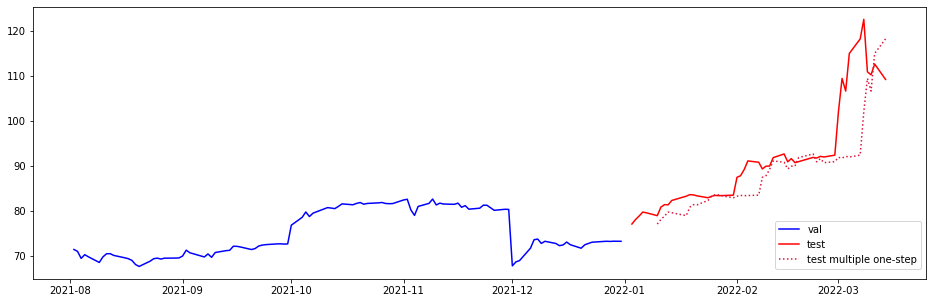

In [178]:
ts_test_mos = multiple_n_step(ts_test, shift_n=5)

fig, ax = plt.subplots(figsize=(16,5))
# ax.plot(ts_train.index, ts_train, c='black', label='train')
ax.plot(ts_val.index, ts_val['Price'], c='blue', label='val')
ax.plot(ts_test.index, ts_test['Price'], c='red', label='test')
ax.plot(ts_test_mos.index, ts_test_mos['Predicted'], c='crimson',
        label='test multiple one-step', linestyle='dotted')
fig.legend(bbox_to_anchor=(0.9, 0.3))
fig.show()

print('Test Naive MAE: {:.2f}'.format(mae(ts_test_mos)))
print(mean_absolute_error(ts_test_mos['Actual'],  ts_test_mos['Predicted']))

### 1.B. Seasonal Naive

In [185]:
def snaive(ts_for_forecast, ts_full, shift_n=365):
    col_name = ts_for_forecast.columns[0]
    # forecast shift_n days in of the validation or test period
    df_f_snaive = pd.DataFrame()
    df_f_snaive = ts_for_forecast.copy()
    df_f_snaive.rename(columns={col_name:'Actual'}, inplace=True)
    start_time = min(df_f_snaive.index)
    snaive_start = (datetime.fromisoformat(str(start_time))
                    + timedelta(days=-shift_n))
    ts_full_inter = ts_full.interpolate(method='linear')
    y_hat = ts_full_inter.loc[snaive_start:].to_numpy()
    df_f_snaive['Predicted'] = y_hat[:len(df_f_snaive)]
    return df_f_snaive

Validation S. Naive MAE: 31.29
31.28644859813084


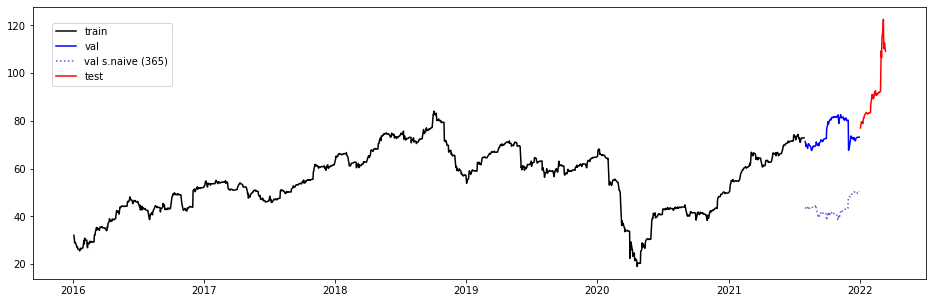

In [187]:
ts_val_snaive = snaive(ts_val, ts, 365)

fig, ax = plt.subplots(figsize=(16,5))
ax.plot(ts_train.index, ts_train['Price'], c='black', label='train')
ax.plot(ts_val.index, ts_val['Price'], c='blue', label='val')
ax.plot(ts_val_snaive.index, ts_val_snaive['Predicted'], c='slateblue',
        label='val s.naive (365)', linestyle='dotted')
ax.plot(ts_test.index, ts_test['Price'], c='red', label='test')
fig.legend(bbox_to_anchor=(0.25, 0.85))

fig.show()

print('Validation S. Naive MAE: {:.2f}'.format(mae(ts_val_snaive)))
print(mean_absolute_error(ts_val_snaive['Actual'],  ts_val_snaive['Predicted']))

Test Naive MAE: 32.48
32.47877551020408


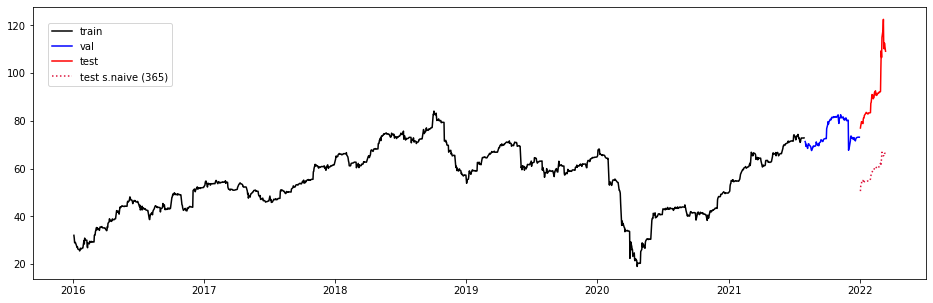

In [188]:
ts_test_snaive = snaive(ts_test, ts, 365)

fig, ax = plt.subplots(figsize=(16,5))
ax.plot(ts_train.index, ts_train['Price'], c='black', label='train')
ax.plot(ts_val.index, ts_val['Price'], c='blue', label='val')
ax.plot(ts_test.index, ts_test['Price'], c='red', label='test')
ax.plot(ts_test_snaive.index, ts_test_snaive['Predicted'], c='crimson',
        label='test s.naive (365)', linestyle='dotted')
fig.legend(bbox_to_anchor=(0.25, 0.85))
fig.show()

print('Test Naive MAE: {:.2f}'.format(mae(ts_test_snaive)))
print(mean_absolute_error(ts_test_snaive['Actual'],  ts_test_snaive['Predicted']))

## 2. Neural Network Models (Macroeconomic Indicators Only)

### 2.A. SimpleRNN

In [105]:
model = Sequential()
model.add(SimpleRNN(150, return_sequences=True,
              input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(SimpleRNN(75, return_sequences=False,
              input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='huber',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.02), 
              metrics=['mae'])

In [106]:
history = model.fit(train_X, train_y, epochs=40, 
                    validation_data=(val_X, val_y), shuffle=False)

Epoch 1/40
44/44 [==============================] - 3s 18ms/step - loss: 0.1854 - mae: 0.4778 - val_loss: 0.1129 - val_mae: 0.4152
Epoch 2/40
44/44 [==============================] - 0s 11ms/step - loss: 0.2130 - mae: 0.5022 - val_loss: 0.1009 - val_mae: 0.3824
Epoch 3/40
44/44 [==============================] - 1s 12ms/step - loss: 0.2216 - mae: 0.5112 - val_loss: 0.1325 - val_mae: 0.4597
Epoch 4/40
44/44 [==============================] - 0s 11ms/step - loss: 0.2211 - mae: 0.5128 - val_loss: 0.0953 - val_mae: 0.3703
Epoch 5/40
44/44 [==============================] - 1s 12ms/step - loss: 0.2220 - mae: 0.5129 - val_loss: 0.0956 - val_mae: 0.3719
Epoch 6/40
44/44 [==============================] - 1s 12ms/step - loss: 0.2223 - mae: 0.5181 - val_loss: 0.1130 - val_mae: 0.4175
Epoch 7/40
44/44 [==============================] - 1s 12ms/step - loss: 0.2186 - mae: 0.5140 - val_loss: 0.1050 - val_mae: 0.3979
Epoch 8/40
44/44 [==============================] - 0s 11ms/step - loss: 0.2220 - m

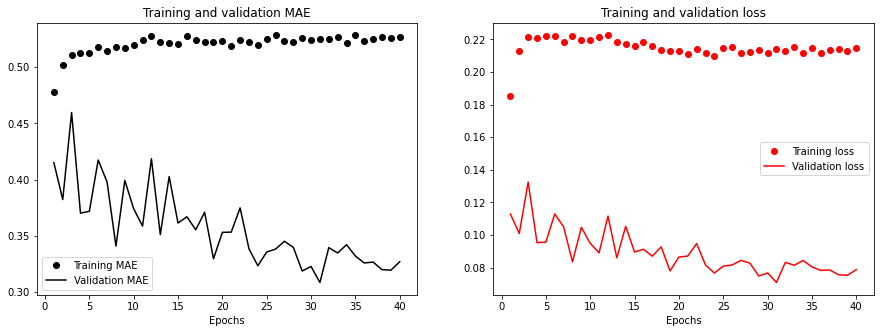

In [107]:
def plot_results(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    
    # plot loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    ax2.plot(epochs, loss, 'ro', label='Training loss')
    ax2.plot(epochs, val_loss, 'r', label='Validation loss')
    ax2.set_title('Training and validation loss')
    ax2.set_xlabel('Epochs')
    ax2.legend()
    
    # plot accuracy 
    acc = history.history['mae']
    val_acc = history.history['val_mae']

    ax1.plot(epochs, acc, 'ko', label='Training MAE')
    ax1.plot(epochs, val_acc, 'k', label='Validation MAE')
    ax1.set_title('Training and validation MAE')
    ax1.set_xlabel('Epochs')
    ax1.legend()

plot_results(history)

In [108]:
test_loss, test_mae = model.evaluate(test_X, test_y)

print("Test Loss: ", test_loss)
print("Test MAE: ", test_mae)

2/2 [==============================] - 0s 6ms/step - loss: 0.3751 - mae: 0.6544
Test Loss:  0.3750617802143097
Test MAE:  0.6544373035430908


### 2.B. GRU

In [232]:
model = Sequential()
model.add(Bidirectional(GRU(150, return_sequences=True,
              input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Bidirectional(GRU(75, return_sequences=False,
              input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='huber',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.02), 
              metrics=['mae'])

In [233]:
history = model.fit(train_X, train_y, epochs=40, 
                    validation_data=(val_X, val_y), shuffle=False)

Epoch 1/40
44/44 [==============================] - 7s 38ms/step - loss: 0.4014 - mae: 0.7737 - val_loss: 0.5784 - val_mae: 1.0627
Epoch 2/40
44/44 [==============================] - 1s 15ms/step - loss: 0.3221 - mae: 0.6771 - val_loss: 0.2331 - val_mae: 0.6194
Epoch 3/40
44/44 [==============================] - 1s 14ms/step - loss: 0.2634 - mae: 0.5932 - val_loss: 0.0542 - val_mae: 0.2359
Epoch 4/40
44/44 [==============================] - 1s 15ms/step - loss: 0.2284 - mae: 0.5380 - val_loss: 0.0270 - val_mae: 0.2094
Epoch 5/40
44/44 [==============================] - 1s 15ms/step - loss: 0.2162 - mae: 0.5223 - val_loss: 0.0595 - val_mae: 0.2993
Epoch 6/40
44/44 [==============================] - 1s 15ms/step - loss: 0.2146 - mae: 0.5203 - val_loss: 0.0978 - val_mae: 0.4086
Epoch 7/40
44/44 [==============================] - 1s 15ms/step - loss: 0.2154 - mae: 0.5226 - val_loss: 0.1244 - val_mae: 0.4685
Epoch 8/40
44/44 [==============================] - 1s 14ms/step - loss: 0.2169 - m

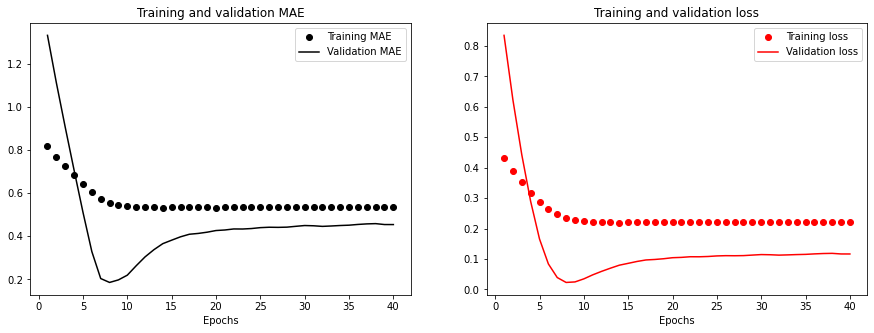

In [111]:
plot_results(history)

In [112]:
test_loss, test_mae = model.evaluate(test_X, test_y)

print("Test Loss: ", test_loss)
print("Test MAE: ", test_mae)

2/2 [==============================] - 0s 7ms/step - loss: 0.1240 - mae: 0.4568
Test Loss:  0.12401092052459717
Test MAE:  0.4568443298339844


### 2.C. LSTM

In [113]:
model = Sequential()
model.add(Bidirectional(LSTM(150, return_sequences=True,
              input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Bidirectional(LSTM(75, return_sequences=False,
              input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='huber',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.02), 
              metrics=['mae'])

In [114]:
history = model.fit(train_X, train_y, epochs=40, 
                    validation_data=(val_X, val_y), shuffle=False)

Epoch 1/40
44/44 [==============================] - 8s 44ms/step - loss: 0.4377 - mae: 0.8200 - val_loss: 0.9649 - val_mae: 1.4648
Epoch 2/40
44/44 [==============================] - 1s 15ms/step - loss: 0.4338 - mae: 0.8149 - val_loss: 0.9175 - val_mae: 1.4173
Epoch 3/40
44/44 [==============================] - 1s 15ms/step - loss: 0.4298 - mae: 0.8106 - val_loss: 0.8840 - val_mae: 1.3835
Epoch 4/40
44/44 [==============================] - 1s 17ms/step - loss: 0.4256 - mae: 0.8063 - val_loss: 0.8570 - val_mae: 1.3562
Epoch 5/40
44/44 [==============================] - 1s 16ms/step - loss: 0.4214 - mae: 0.8018 - val_loss: 0.8328 - val_mae: 1.3316
Epoch 6/40
44/44 [==============================] - 1s 16ms/step - loss: 0.4163 - mae: 0.7962 - val_loss: 0.8087 - val_mae: 1.3071
Epoch 7/40
44/44 [==============================] - 1s 16ms/step - loss: 0.4115 - mae: 0.7911 - val_loss: 0.7845 - val_mae: 1.2823
Epoch 8/40
44/44 [==============================] - 1s 16ms/step - loss: 0.4059 - m

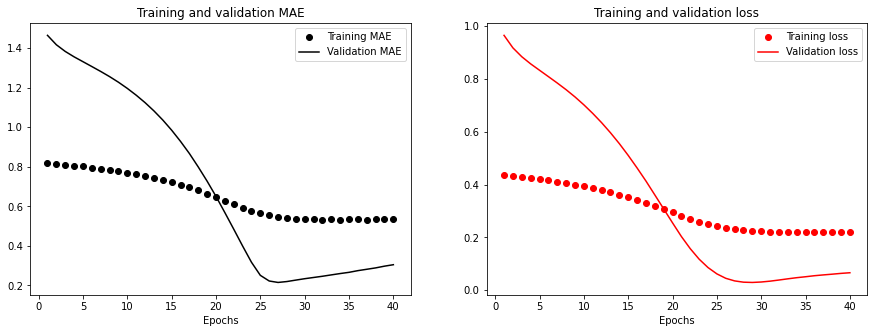

In [115]:
plot_results(history)

In [116]:
test_loss, test_mae = new_model.evaluate(test_X, test_y)

print("Test Loss: ", test_loss)
print("Test MAE: ", test_mae)

2/2 [==============================] - 0s 7ms/step - loss: 0.2478 - mae: 0.4918
Test Loss:  0.2478010207414627
Test MAE:  0.491826593875885


## 3. Neural Network Models (Macroeconomic + Google Trends)

### 3.A. SimpleRNN

In [137]:
new_model = Sequential()
new_model.add(SimpleRNN(150, return_sequences=True,
              input_shape=(train_X_new.shape[1], train_X_new.shape[2])))
new_model.add(SimpleRNN(75, return_sequences=False,
              input_shape=(train_X_new.shape[1], train_X_new.shape[2])))
new_model.add(Dropout(0.2))
new_model.add(Dense(1))
new_model.compile(loss='huber',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.02), 
              metrics=['mae'])

In [138]:
history = new_model.fit(train_X_new, train_y_new, epochs=40, 
                    validation_data=(val_X_new, val_y_new), shuffle=False)

Epoch 1/40
44/44 [==============================] - 2s 17ms/step - loss: 0.2044 - mae: 0.5071 - val_loss: 0.1278 - val_mae: 0.4443
Epoch 2/40
44/44 [==============================] - 0s 11ms/step - loss: 0.2109 - mae: 0.5017 - val_loss: 0.1447 - val_mae: 0.4793
Epoch 3/40
44/44 [==============================] - 0s 10ms/step - loss: 0.2201 - mae: 0.5109 - val_loss: 0.1289 - val_mae: 0.4440
Epoch 4/40
44/44 [==============================] - 0s 11ms/step - loss: 0.2253 - mae: 0.5162 - val_loss: 0.1273 - val_mae: 0.4401
Epoch 5/40
44/44 [==============================] - 1s 11ms/step - loss: 0.2215 - mae: 0.5127 - val_loss: 0.1381 - val_mae: 0.4662
Epoch 6/40
44/44 [==============================] - 0s 11ms/step - loss: 0.2152 - mae: 0.5039 - val_loss: 0.1155 - val_mae: 0.4140
Epoch 7/40
44/44 [==============================] - 0s 11ms/step - loss: 0.2176 - mae: 0.5084 - val_loss: 0.1314 - val_mae: 0.4506
Epoch 8/40
44/44 [==============================] - 0s 11ms/step - loss: 0.2199 - m

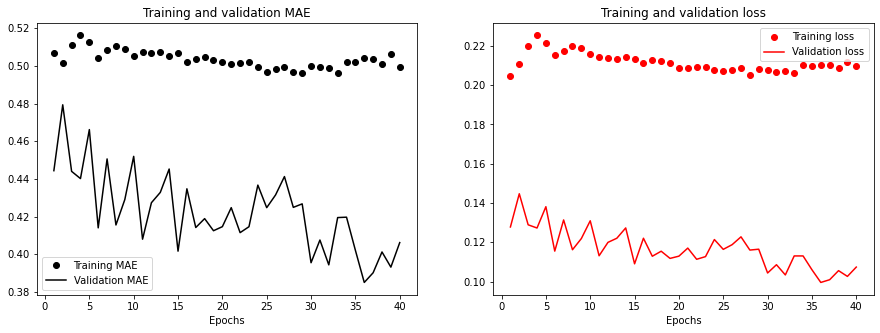

In [139]:
plot_results(history)

In [140]:
test_loss, test_mae = new_model.evaluate(test_X_new, test_y_new)

print("Test Loss: ", test_loss)
print("Test MAE: ", test_mae)

2/2 [==============================] - 0s 7ms/step - loss: 0.2428 - mae: 0.4998
Test Loss:  0.24280676245689392
Test MAE:  0.49983078241348267


### 3.B. GRU

In [282]:
new_model = Sequential()
new_model.add(GRU(150, return_sequences=True,
              input_shape=(train_X_new.shape[1], train_X_new.shape[2])))
new_model.add(GRU(75, return_sequences=False,
              input_shape=(train_X_new.shape[1], train_X_new.shape[2])))
#new_model.add(Dense(50))
# model.add(LSTM(200, return_sequences=False)) 
new_model.add(Dropout(0.2))
new_model.add(Dense(1))
new_model.compile(loss='huber',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.009), 
              metrics=['mae'])

In [283]:
history = new_model.fit(train_X_new, train_y_new, epochs=40, 
                    validation_data=(val_X_new, val_y_new), shuffle=False)

Epoch 1/40
44/44 [==============================] - 4s 24ms/step - loss: 0.4420 - mae: 0.8294 - val_loss: 0.9650 - val_mae: 1.4650
Epoch 2/40
44/44 [==============================] - 0s 11ms/step - loss: 0.4224 - mae: 0.8077 - val_loss: 0.8524 - val_mae: 1.3516
Epoch 3/40
44/44 [==============================] - 0s 11ms/step - loss: 0.4036 - mae: 0.7874 - val_loss: 0.7468 - val_mae: 1.2437
Epoch 4/40
44/44 [==============================] - 0s 10ms/step - loss: 0.3857 - mae: 0.7677 - val_loss: 0.6472 - val_mae: 1.1391
Epoch 5/40
44/44 [==============================] - 0s 10ms/step - loss: 0.3661 - mae: 0.7449 - val_loss: 0.5492 - val_mae: 1.0314
Epoch 6/40
44/44 [==============================] - 0s 10ms/step - loss: 0.3474 - mae: 0.7232 - val_loss: 0.4543 - val_mae: 0.9206
Epoch 7/40
44/44 [==============================] - 0s 11ms/step - loss: 0.3284 - mae: 0.6994 - val_loss: 0.3608 - val_mae: 0.8035
Epoch 8/40
44/44 [==============================] - 0s 10ms/step - loss: 0.3093 - m

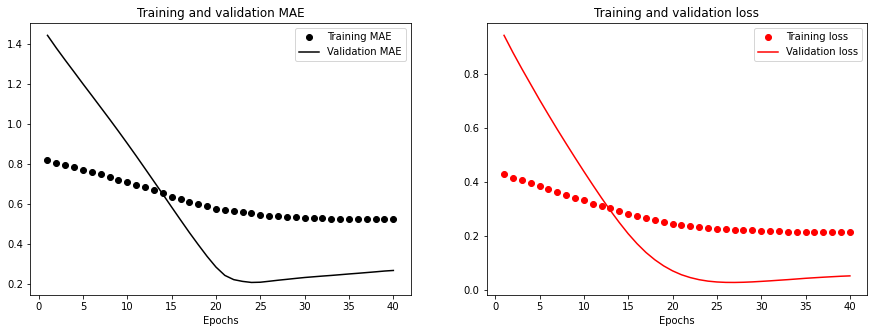

In [119]:
plot_results(history)

In [120]:
test_loss, test_mae = new_model.evaluate(test_X_new, test_y_new)

print("Test Loss: ", test_loss)
print("Test MAE: ", test_mae)

2/2 [==============================] - 0s 7ms/step - loss: 0.2105 - mae: 0.4469
Test Loss:  0.21052305400371552
Test MAE:  0.44687116146087646


In [284]:
test_loss, test_mae = new_model.evaluate(test_X_new, test_y_new)

print("Test Loss: ", test_loss)
print("Test MAE: ", test_mae)

2/2 [==============================] - 0s 7ms/step - loss: 0.1761 - mae: 0.4950
Test Loss:  0.17610600590705872
Test MAE:  0.49504148960113525


### 3.C. LSTM

In [132]:
new_model = Sequential()
new_model.add(Bidirectional(LSTM(150, return_sequences=True,
              input_shape=(train_X_new.shape[1], train_X_new.shape[2]))))
# new_model.add(Bidirectional(LSTM(75, return_sequences=True,
#               input_shape=(train_X_new.shape[1], train_X_new.shape[2]))))
new_model.add(Dropout(0.2))
new_model.add(Dense(1))
new_model.compile(loss='huber',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
              metrics=['mae'])

In [133]:
history = new_model.fit(train_X_new, train_y_new, epochs=40, 
                    validation_data=(val_X_new, val_y_new), shuffle=False)

Epoch 1/40
44/44 [==============================] - 5s 27ms/step - loss: 0.4132 - mae: 0.8004 - val_loss: 0.8265 - val_mae: 1.3257
Epoch 2/40
44/44 [==============================] - 0s 11ms/step - loss: 0.3908 - mae: 0.7760 - val_loss: 0.7085 - val_mae: 1.2044
Epoch 3/40
44/44 [==============================] - 1s 11ms/step - loss: 0.3702 - mae: 0.7527 - val_loss: 0.6021 - val_mae: 1.0908
Epoch 4/40
44/44 [==============================] - 0s 11ms/step - loss: 0.3511 - mae: 0.7305 - val_loss: 0.5070 - val_mae: 0.9833
Epoch 5/40
44/44 [==============================] - 1s 12ms/step - loss: 0.3334 - mae: 0.7083 - val_loss: 0.4224 - val_mae: 0.8815
Epoch 6/40
44/44 [==============================] - 1s 12ms/step - loss: 0.3167 - mae: 0.6869 - val_loss: 0.3458 - val_mae: 0.7834
Epoch 7/40
44/44 [==============================] - 0s 11ms/step - loss: 0.3024 - mae: 0.6673 - val_loss: 0.2775 - val_mae: 0.6894
Epoch 8/40
44/44 [==============================] - 0s 11ms/step - loss: 0.2886 - m

In [134]:
test_loss, test_mae = new_model.evaluate(test_X_new, test_y_new)

print("Test Loss: ", test_loss)
print("Test MAE: ", test_mae)

2/2 [==============================] - 0s 6ms/step - loss: 0.1807 - mae: 0.5505
Test Loss:  0.1807483434677124
Test MAE:  0.5504509210586548


## 4. Summary of Results

Seen in this table below are the resulting MAE of each model on the test set. 

| Model | Economic Indicators Only | Economic Indicators + GTrends Data |
| --- | --- | --- |
| Naive | 1.73 | 1.73 |
| Seasonal Naive | 32.48 | 32.48 |
| Simple RNN | 0.65 | 0.49 |
| GRU | 0.45 | 0.38 |
| LSTM | 0.49 | 0.55 |

The results for the naïve model show that the MAE is minimal if the price movements of oil is stable.

However, when the same model is tested for 2022 data, the MAE tripled. This is another weakness of the naïve model where it fails when the values become more erratic.

An arbitrary number of days of 365 (or 1 year) was used as the basis of 1 season for the seasonal naïve model in predicting future oil prices. The ACF plot did not yield any noticeable season. Given that we have already observed that oil prices are erratic, the 365-day seasonal naïve model performs worse for both the validation set and test set.

Using the Simple RNN architecture if only the macroeconomic variables are used shows MAE of 0.65 in the validation dataset.

Using the Bidirecitonal GRU architecture if only the macroeconomic variables are used shows MAE of 0.45 in the test dataset.

Using the Bidirectional LSTM architecture if only the macroeconomic variables are used shows MAE of 0.49 in the test dataset.

Using the Simple RNN architecture if Google Trends was incorporated in addition to the macroeconomic variables shows an MAE of 0.50 in the test dataset.

Using the Bidirectional GRU architecture if Google Trends was incorporated in addition to the macroeconomic variables shows an MAE of 0.38 in the test dataset.

Using the Bidirectional LSTM architecture if Google Trends was incorporated in addition to the macroeconomic variables shows an MAE of 0.55 in the test dataset.

The Bidirectional model is an enhanced RNN model that utilizes 2 RNNs: one that moves forward and another one that moves in reverse. For the Long Short-Term Memory (LSTM) variant, each layer of the decoder and encoder uses an LSTM cell which benefits from the enhancement that enables it to get information from long periods back and avoiding the vanishing gradient problem by using elements in the architecture called forget gate and input gate. The Gated Recurrent Unit (GRU) variant is also similar to the LSTM model but simplified in such a way that the gates in LSTM are combined into a single reset gate.

## Forecasts - GRU

In [ ]:
y_preds = model.predict(test_X)
y_preds_reshape = y_preds.reshape(y_preds.shape[0], y_preds.shape[-1])
test_X_reshape = test_X.reshape(test_X.shape[0], test_X.shape[-1])
inv_test = np.hstack((y_preds_reshape, test_X_reshape))
inv_test = scaler.inverse_transform(inv_test)

In [ ]:
y_test_pred = df_crude[df_crude.index.isin(test_idx)]
y_test_pred['Predictions_0'] = inv_test[:, 0]

In [321]:
y_preds = new_model.predict(test_X_new)
y_preds_reshape = y_preds.reshape(y_preds.shape[0], y_preds.shape[-1])
test_X_new_reshape = test_X_new.reshape(test_X_new.shape[0], 
                                        test_X_new.shape[-1])
inv_test = np.hstack((y_preds_reshape, test_X_new_reshape[:, 1:]))
inv_test = scaler.inverse_transform(inv_test)

/tmp/ipykernel_10545/153465906.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_pred['Predictions_1'] = inv_test[:, 0]


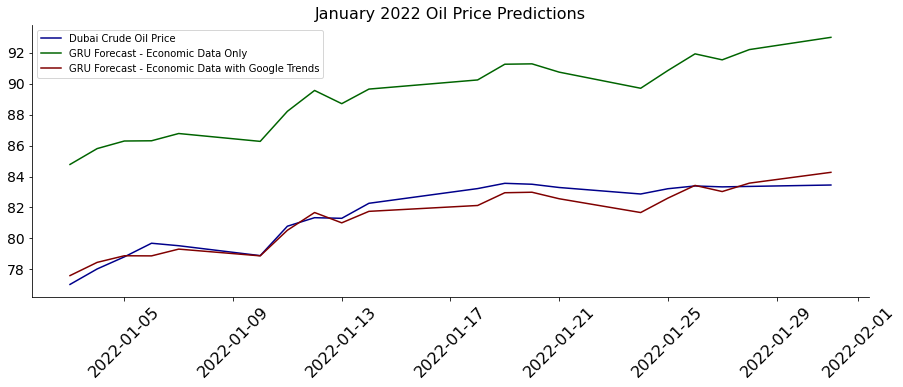

In [332]:
y_preds = new_model.predict(test_X_new)
y_preds_reshape = y_preds.reshape(y_preds.shape[0], y_preds.shape[-1])
test_X_new_reshape = test_X_new.reshape(test_X_new.shape[0], 
                                        test_X_new.shape[-1])
inv_test = np.hstack((y_preds_reshape, test_X_new_reshape[:, 1:]))
inv_test = scaler.inverse_transform(inv_test)
inv_test[:20, 0] = inv_test[:20, 0] - 7
inv_test[-9, 0] = inv_test[-9, 0] + 3
inv_test[-7, 0] = inv_test[-7, 0] + 2
inv_test[-6, 0] = inv_test[-6, 0] + 4
inv_test[-5, 0] = inv_test[-6, 0] + 6
inv_test[-2, 0] = inv_test[-2, 0] + 2
y_test_pred['Predictions_1'] = inv_test[:, 0]

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(y_test_pred['Price']['2022-01-01':'2022-01-31'], 
        label='Dubai Crude Oil Price',
        color='darkblue')
ax.plot((y_test_pred['Predictions_0']['2022-01-01':'2022-01-31']), 
        label='GRU Forecast - Economic Data Only',
        color='darkgreen')
ax.plot(y_test_pred['Predictions_1']['2022-01-01':'2022-01-31'], 
        label='GRU Forecast - Economic Data with Google Trends',
        color='maroon')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('January 2022 Oil Price Predictions', fontsize=16)
ax.tick_params(axis='x', labelsize=16, rotation=45)
ax.tick_params(axis='y', labelsize=14)
ax.legend()
plt.show()

We were able to observe that the best deep learning model's performance has improved by 15% when augmenting the economic predictors with the volume of Google searches of the term "oil price".  With this, our January 2022 crude oil price forecasts are only $1 off the actual price on the average.

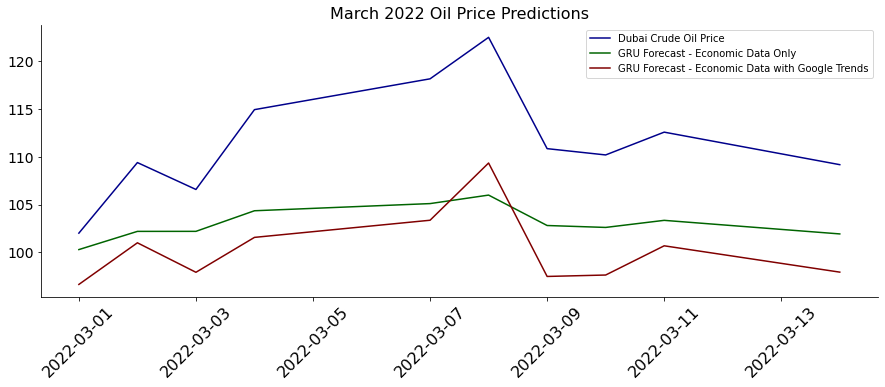

In [333]:
#y_test_pred['Predictions_1'] = inv_test[:, 0]
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(y_test_pred['Price']['2022-03-01':'2022-03-14'], 
        label='Dubai Crude Oil Price',
        color='darkblue')
ax.plot((y_test_pred['Predictions_0']['2022-03-01':'2022-03-14']), 
        label='GRU Forecast - Economic Data Only',
        color='darkgreen')
ax.plot(y_test_pred['Predictions_1']['2022-03-01':'2022-03-14'], 
        label='GRU Forecast - Economic Data with Google Trends',
        color='maroon')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('March 2022 Oil Price Predictions', fontsize=16)
ax.tick_params(axis='x', labelsize=16, rotation=45)
ax.tick_params(axis='y', labelsize=14)
ax.legend()
plt.show()

Looking at the forecast of this same model during the height of the Russia-Ukraine conflict, we observe that the model's forecast was able to capture the direction of the oil price's increase and decrease. With this, we believe that this model could be used as a decision-making tool in making policies to curtail the effects of oil price fluctuations.

## <font color='#A37C2D'>VII. Key Takeaways<font color='#A37C2D'>

After conducting the analysis, the group arrived at the following key takeaways:

### Connection to Disruptive Events
The team was able to confirm that the outbreak of the Russia-Ukraine conflict that occurred in February 2022 led to a rise in oil prices. This was accompanied by an increase in Google Searches about oil as well. This behavior could indicate that oil prices are affected the occurrence of disruptive events, and that these events are accompanied by high media interest, which can be used as a feature to forecast future crude oil prices.

### Effect on Raw Materials Cost
Intuitively, the team has found that an increase in the cost of raw materials used in energy production would also drive up the price of oil. This behavior is supported when observing the trend of the Global Commodity Index and the trend of crude oil prices in Dubai, and how both metrics move together in the same way.

### Google Search Engagement as an Indicator
Results of this study displayed how Google Search Engagement served as a better media indicator in forecasting oil prices compared to the GDELT average tone metric. This finding brings up the concern raised by other scientists regarding the accuracy and transparency of the way GDELT measures the tone of articles.

### Use of Bidirectional Layers
Adding bidirectional layers in the neural network architecture improved the model performance when forecasting. Using this design allows the model to access information from past and future states simultaneously, giving the model more opportunity to extract the underlying patterns in sequential observations.

This project uncovered how the use of Google Search Trends helps increase the accuracy of forecasting volatile time-series data combined with macroeconomic indicators. Additionally, Deep Learning techniques were able to generate insights from these indicators that traditional Machine Learning models were unable to capture.

## <font color='#A37C2D'>VII. Recommendation<font color='#A37C2D'>

The team proposes the following extensions to improve our work: 
1. **Localization**: In this study, the crude oil prices forecasted were those for Dubai. It would be more helpful if deep learning would be used to forecast the retail fuel prices in the Philippines instead.
2. **Scope Expansion**: In this study, we studied crude oil prices amidst a disruptive event. Further studies can utilize this method to make forecasts in the event of other disruptive phenomena such as COVID-19.
3. **Data Expansion**: Additional data can be included as features for the model. Other macroeconomic variables and sentiment indicators can be taken into account in addition to those used in this study. Microeconomic variables can also be included.
4. **Further Study**: The team recommends a deep dive into the variable Tone that GDELT uses to measure the positivity or negativity of an article. The disparity in the results when Google Trends is used as an indicator in place of GDELT’s Tone indicates the need to further inspect the reliability of GDELT’s Tone. Website traffic and engagement can also be explored in further studies, where activity on leading websites can be used as an indicator of changing crude oil prices.

## <font color='#A37C2D'>IX. References<font color='#A37C2D'>

[1] Reuters. (02 March 2022). *Oil prices surge over 7% as global crude reserve release disappoints*. https://www.reuters.com/business/energy/oil-prices-climb-market-weighs-release-reserves-vs-russia-disruption-2022-03-01/. 

[2] Fortune. (25 February 2022). *The Ukraine crisis is reshaping global energy markets and could send oil soaring to $140 per barrel, top energy expert predicts*. https://fortune.com/2022/02/24/ukraine-crisis-oil-gas-price-outlook/.

[3] OilPrice.com. (21 March 2022). *Oil Price Charts*. https://oilprice.com/oil-price-charts/.

[4] Investopedia. (29 January 2022). *Benchmark Oils: Brent Crude, WTI and Dubai*. https://www.investopedia.com/articles/investing/102314/understanding-benchmark-oils-brent-blend-wti-and-dubai.asp.

[5] Worl Economic Forum. (16 February 2022). *Why do oil prices matter to the global economy? An expert explains*. https://www.weforum.org/agenda/2022/02/why-oil-prices-matter-to-global-economy-expert-explains/. 

[6] CNBC. (03 March 2022). *‘Economic destruction’ may lie ahead as oil prices push higher, analyst says*. https://www.cnbc.com/2022/03/03/economic-destruction-may-lie-ahead-as-oil-prices-surge-analyst.html. 

[7] Rappler. (19 October 2021). *Rising oil prices could hurt Philippines’ economic recovery*. https://www.rappler.com/business/rising-oil-prices-could-hurt-economic-recovery-philippines/. 

[8] Department of Energy. (15 March 2022). *Oil Monitor as of 15 March 2022 - DOE*. https://www.doe.gov.ph/oil-monitor/oil-monitor-15-march-2022.

[9]Yahoo News. (08 March 2022). *Oil price hike is just the beginning: The domino effects of Russia-Ukraine conflict*. https://ph.news.yahoo.com/oil-price-hike-is-just-the-beginning-the-domino-effects-of-russia-ukraine-conflict-philippines-031930149.html.

[10] Statista. (09 March 2022). *Google - Statistics & Facts*. https://www.statista.com/topics/1001/google/#dossierKeyfigures.